# Load Library

In [1]:
import sklearn
print('scikit-learn version:', sklearn.__version__)
import warnings
warnings.filterwarnings('ignore')
import regex as re

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from imblearn import over_sampling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold
 

scikit-learn version: 1.6.1
numpy version :  2.1.3
pandas version :  2.2.3
seaborn version :  0.13.2


# Load Dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv("train.csv")
dataset.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
19459,"Louisville East Courtyard Louisville, KY",0,109,2018,November,47,17,0,3,2,0.0,0,BB,CZE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,90.0,0,1,Check-Out,2018-11-20,19460
78675,"St. Louis Downtown West Courtyard St. Louis, MO",0,184,2019,August,34,20,2,2,2,0.0,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,410.0,NaN,0,Transient,116.5,0,0,Check-Out,2019-08-24,78676
81509,"African Pride Melrose Arch, Autograph Collecti...",1,66,2018,September,37,9,0,2,3,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,168.3,0,0,Canceled,2018-08-08,81510
45481,"Grosvenor House, A JW Marriott Hotel London, U...",1,69,2018,June,25,12,2,4,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,236.0,NaN,0,Transient,120.0,0,0,Canceled,2018-04-27,45482
14980,"W New York – Times Square New York, NY",0,21,2019,June,22,2,0,2,2,0.0,0,BB,ROU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,101.5,1,1,Check-Out,2019-06-04,14981


# Data Understanding

## Hotel Booking Dataset Description

### Hotel Information
- **hotel**: Type of hotel (Categorical)

### Booking Status
- **is_canceled**: Whether the booking was canceled (Binary)
- **lead_time**: Days between booking date and arrival date (Numeric)

### Arrival Date Details
- **arrival_date_year**: Year of arrival (Numeric)
- **arrival_date_month**: Month of arrival (Categorical)
- **arrival_date_week_number**: Week number of arrival (Numeric)
- **arrival_date_day_of_month**: Day of month of arrival (Numeric)

### Stay Details
- **stays_in_weekend_nights**: Number of weekend nights stayed/booked (Numeric)
- **stays_in_week_nights**: Number of week nights stayed/booked (Numeric)

### Guest Composition
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of infants

### Booking Details
- **meal**: Type of food option included (Categorical)
- **country**: Country of guest (Categorical)
- **market_segment**: Customer market segment (Categorical)
- **distribution_channel**: Booking distribution channel (Categorical)
- **is_repeated_guest**: Whether the guest is a repeated visitor (Binary)
- **previous_cancellations**: Number of previous bookings canceled by the guest
- **previous_bookings_not_canceled**: Number of previous bookings not canceled by the guest

### Accommodation Details
- **reserved_room_type**: Originally reserved room type (Categorical)
- **assigned_room_type**: Finally assigned room type (Categorical)
- **booking_changes**: Number of changes to the booking before arrival (Numeric)
- **deposit_type**: Type of deposit made (Categorical)
- **agent**: ID of travel agency (Categorical)
- **company**: ID of company involved (Categorical)

### Additional Information
- **days_in_waiting_list**: Days the booking was on the waiting list (Numeric)
- **customer_type**: Type of customer (Categorical)
- **adr**: Average Daily Rate per room, calculated as the sum of all lodging transactions divided by total staying nights (Numeric)


## Goals

The goal of this project is to understand the key factors contributing to hotel booking Cancellations and provide actionable insights to reduce them; in addition, a predictive model is developed to try and proactively reduce the amount of Cancellation that happens.

# Data Pre-Processing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

## Duplicate Handling

In [5]:
# Total rows before dropping duplicates
total_rows = len(dataset)

# Total rows after dropping duplicates
unique_rows = len(dataset.drop_duplicates())

# Total duplicate rows
duplicate_rows = total_rows - unique_rows

print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {duplicate_rows}")

Total rows: 83293
Unique rows: 83293
Duplicate rows: 0


## Missing Value Handling

In [6]:
missing_counts = dataset.isnull().sum()

print(missing_counts)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


Null Values :

Chilren -> 3 || Country -> 346  || Agent -> 11404 || Company -> 78559

We will impute children with the median value, since it is a numeric feature with less than 1% missing values, making median a robust choice to handle any minor inconsistencies. 

For country, we will fill missing values with the most frequent country (mode) to maintain a realistic distribution of guest origins. 

Missing agent values will be replaced with 'No Agent' to clearly indicate bookings made without an intermediary. 

Lastly, the company column will be dropped entirely because over 94% of its values are missing, and the remaining information is too sparse to contribute meaningfully to the analysis.

In [7]:
# 1️⃣ Impute 'children' with the median (numeric, <1% missing)
dataset['children'] = dataset['children'].fillna(dataset['children'].median())

# 2️⃣ Impute 'country' with the mode (most frequent country)
dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0])

# 3️⃣ Impute 'agent' with '0'
dataset['agent'] = dataset['agent'].fillna(0).astype(float)

# 4️⃣ Drop 'company' column (too sparse)
dataset.drop('company', axis=1, inplace=True)

In [8]:
dataset.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
54638,"Sheraton Diana Majestic, Milan Milan, Italy",1,115,2019,June,25,21,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,0,Transient,93.6,0,0,Canceled,2019-03-08,54639
66499,"Grosvenor House, A JW Marriott Hotel London, U...",0,31,2019,February,5,3,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,0,Transient-Party,55.0,1,1,Check-Out,2019-02-04,66500
65559,"Sheraton Diana Majestic, Milan Milan, Italy",0,162,2019,April,13,1,2,1,2,0.0,0,BB,CN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,296.0,0,Transient-Party,88.2,0,0,Check-Out,2019-04-04,65560
54982,Courtyard by Marriott Aberdeen Airport Aberdee...,0,100,2018,July,28,3,2,2,2,1.0,0,BB,DNK,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9.0,0,Transient,130.5,0,0,Check-Out,2018-07-07,54983
61841,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,64,2018,May,22,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,140.4,0,0,Canceled,2018-03-31,61842


## Outlier Handling

In [9]:
dataset['days_in_waiting_list'].quantile(0.99)


np.float64(77.0)

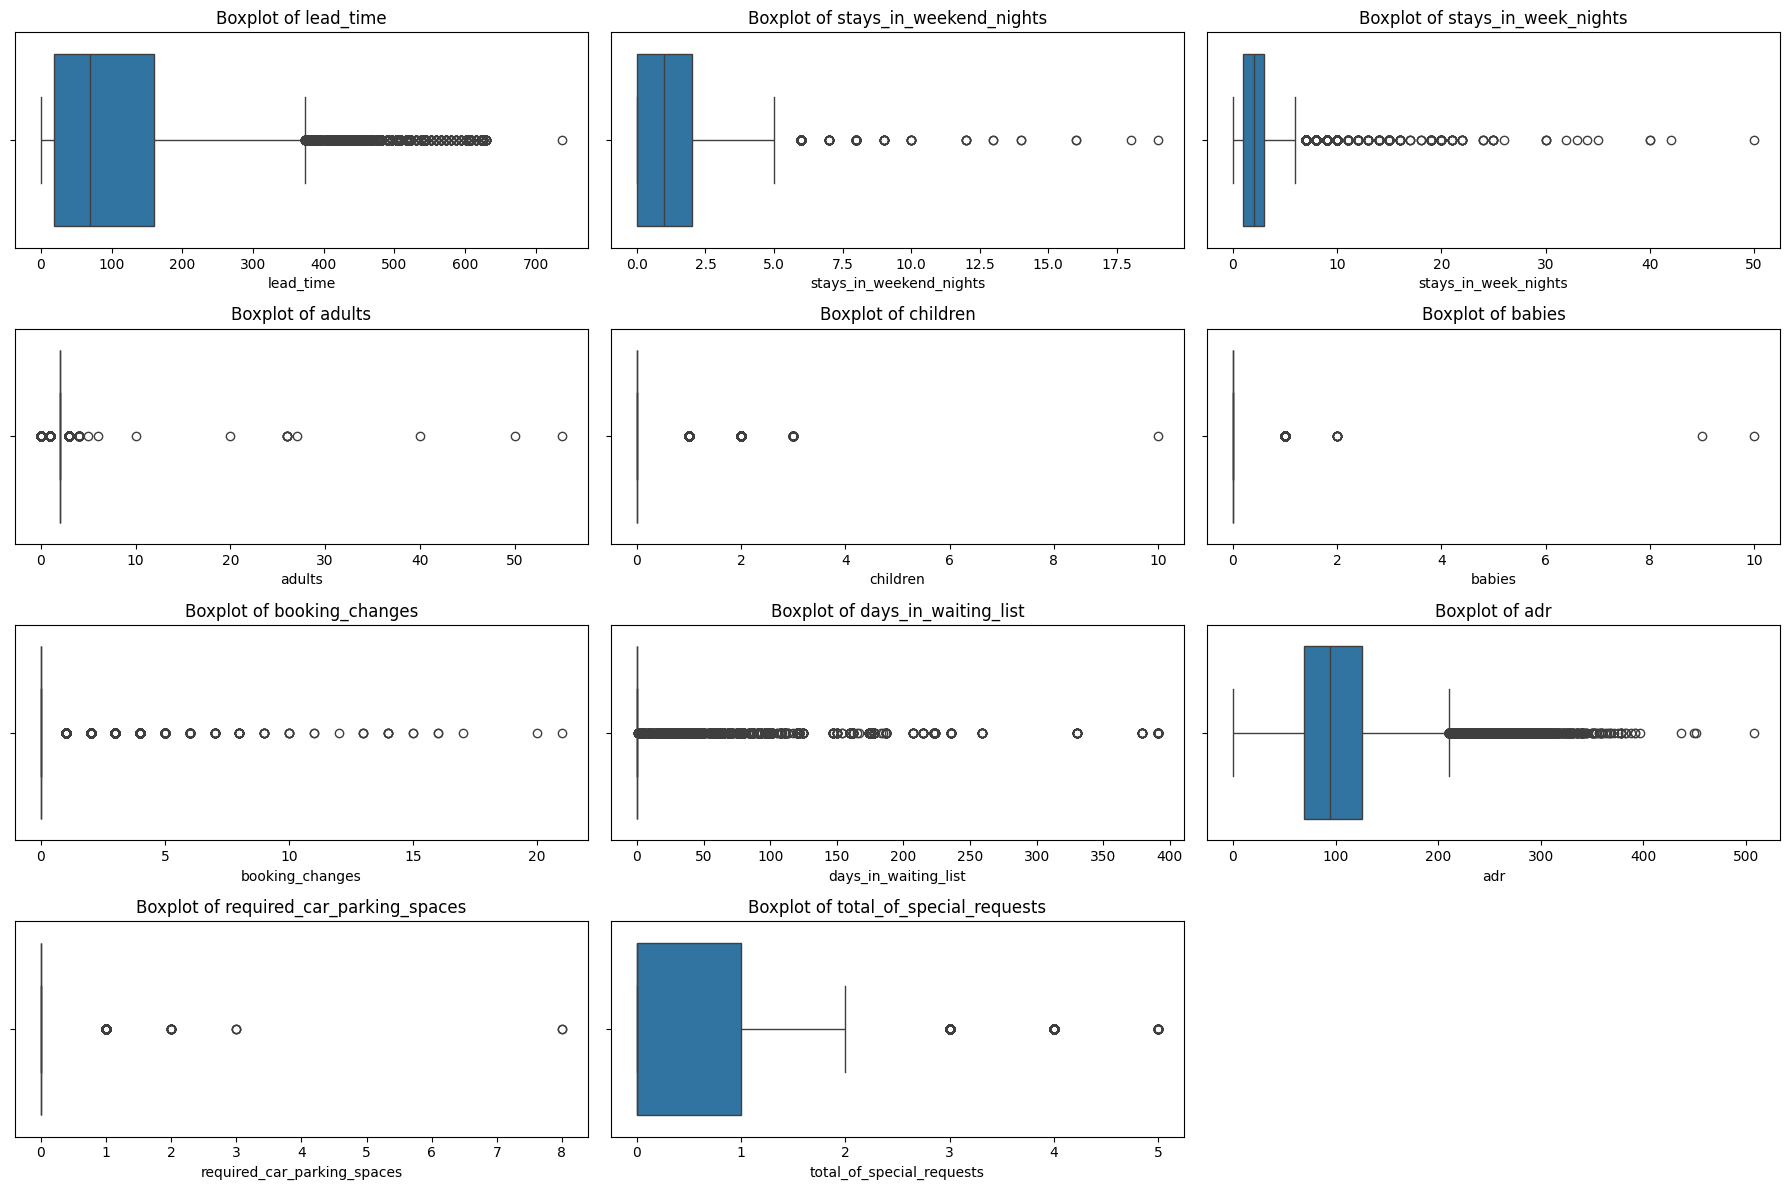

In [10]:
numeric_cols = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


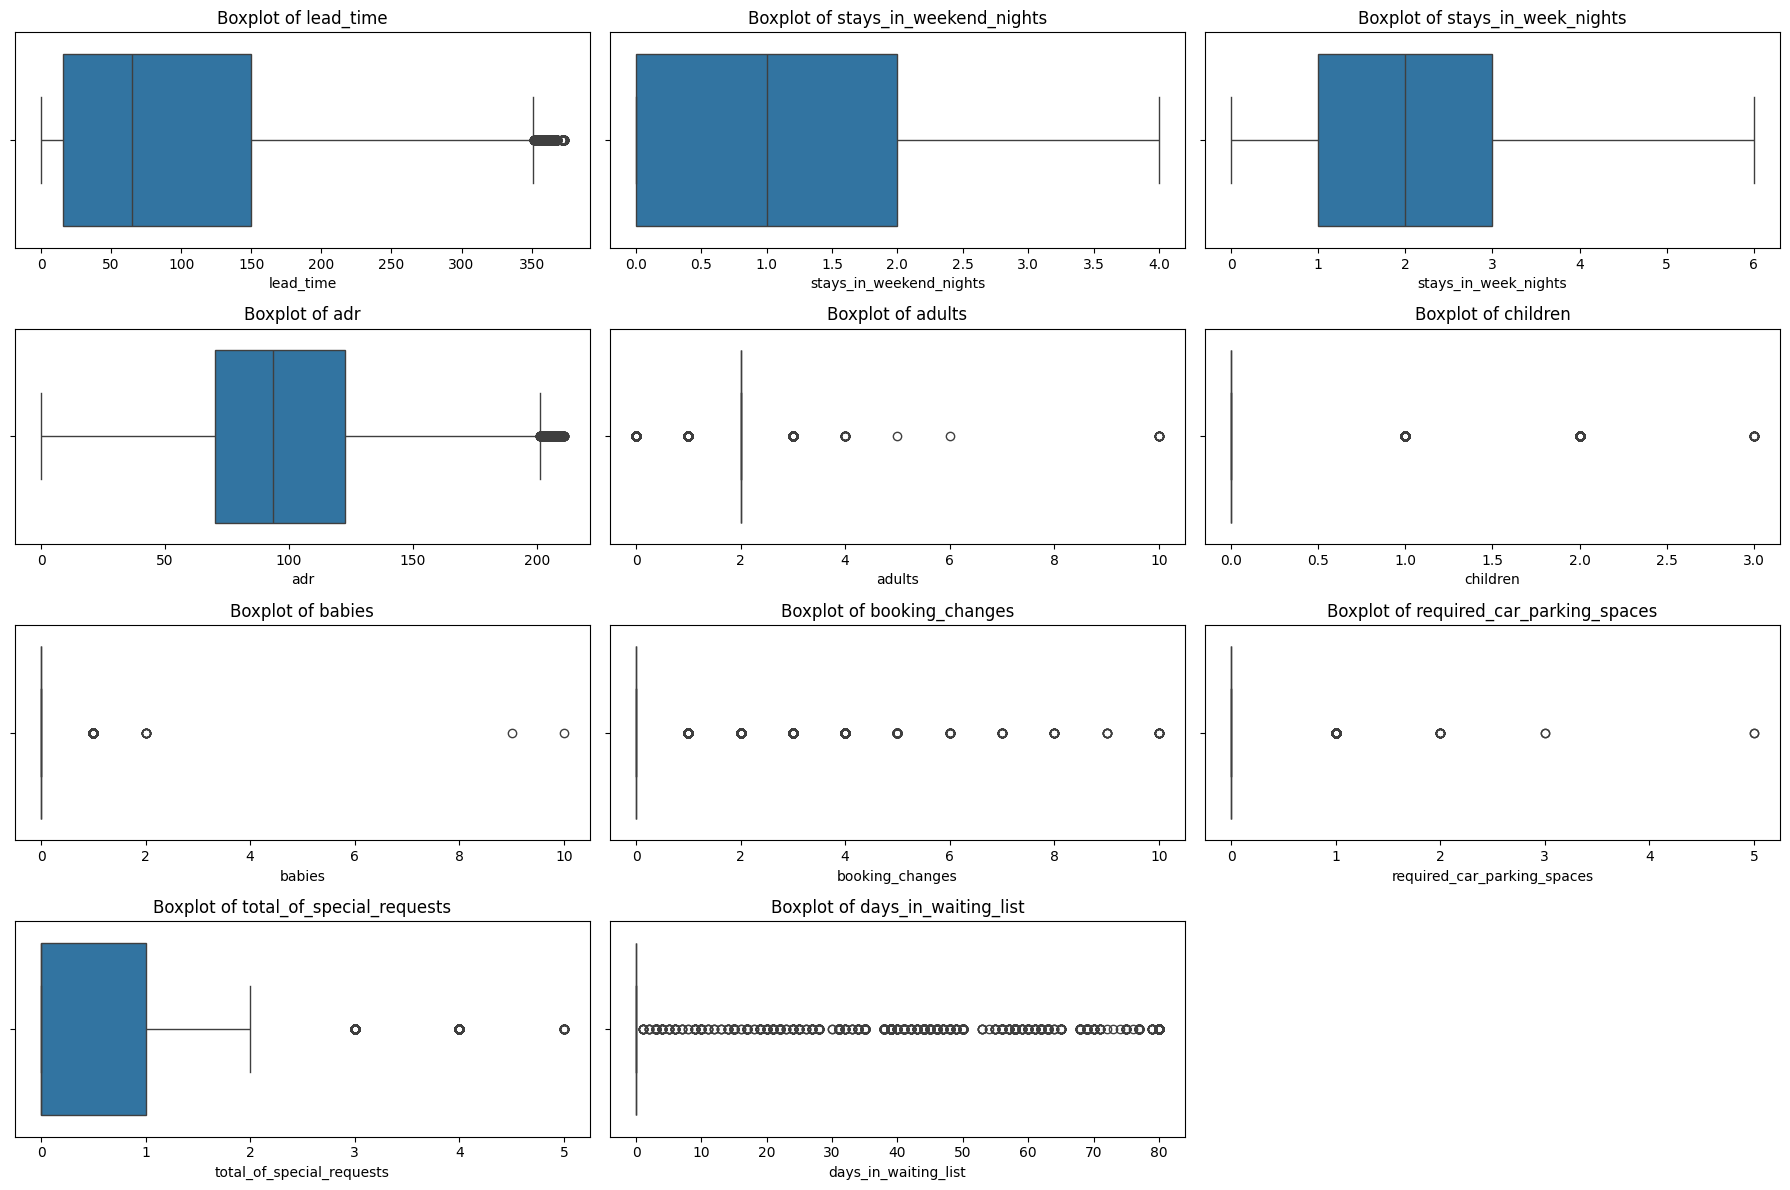

Original rows: 83293
Rows after IQR removal and capping: 76289


In [11]:

# 1️⃣ Make a working copy
df_capped = dataset.copy()

# 2️⃣ Define columns for each step
# Columns for IQR-based outlier removal
iqr_cols = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adr'
]

cap_cols = {
    'adults': 10,
    'children': 10,
    'babies': 10,
    'booking_changes': 10,
    'required_car_parking_spaces': 5,
    'total_of_special_requests': 5,
    'days_in_waiting_list': 80
}


# 3️⃣ Apply IQR removal
for col in iqr_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped = df_capped[(df_capped[col] >= lower_bound) & (df_capped[col] <= upper_bound)]

# 4️⃣ Apply capping for specified columns
for col, cap_value in cap_cols.items():
    df_capped[col] = df_capped[col].clip(upper=cap_value)

# 5️⃣ Plot boxplots for ALL relevant numeric columns
numeric_cols = iqr_cols + list(cap_cols.keys())

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# ✅ Show before vs after row counts
print(f"Original rows: {dataset.shape[0]}")
print(f"Rows after IQR removal and capping: {df_capped.shape[0]}")


We applied capping to variables like adults, children, babies, booking_changes, required_car_parking_spaces, and total_of_special_requests because these features are discrete counts that can occasionally have unrealistically high or rare values due to data entry errors or unusual cases. By capping them at reasonable upper limits, we reduce the influence of extreme values while preserving the meaningful distribution of typical bookings.

Since days_in_waiting_list has a highly skewed distribution with most bookings at zero but some valid long wait periods, we decided to cap its maximum at a reasonable value instead of treating positive values as outliers, to preserve realistic booking scenarios while reducing the impact of extreme cases

# Exploratory Data Analysis

In [12]:
df_capped.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5
6,"W New York – Times Square New York, NY",0,205,2019,June,24,13,0,4,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,150.75,0,2,Check-Out,2019-06-17,7


In [13]:
df_capped["hotel"].value_counts()


hotel
Sacramento Airport Natomas Courtyard Sacramento, CA                            1264
Renaissance New York Times Square Hotel New York, NY                           1261
Las Vegas Marriott Las Vegas, NV                                               1248
Crystal Cove, Barbados Barbados                                                1243
Hotel Alfonso XIII, a Luxury Collection Hotel, Seville Seville, Spain          1235
                                                                               ... 
W New York – Union Square New York, NY                                         1147
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1147
Greensboro Courtyard Greensboro, NC                                            1144
The House, Barbados Barbados                                                   1144
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1125
Name: count, Length: 64, dtype: int64

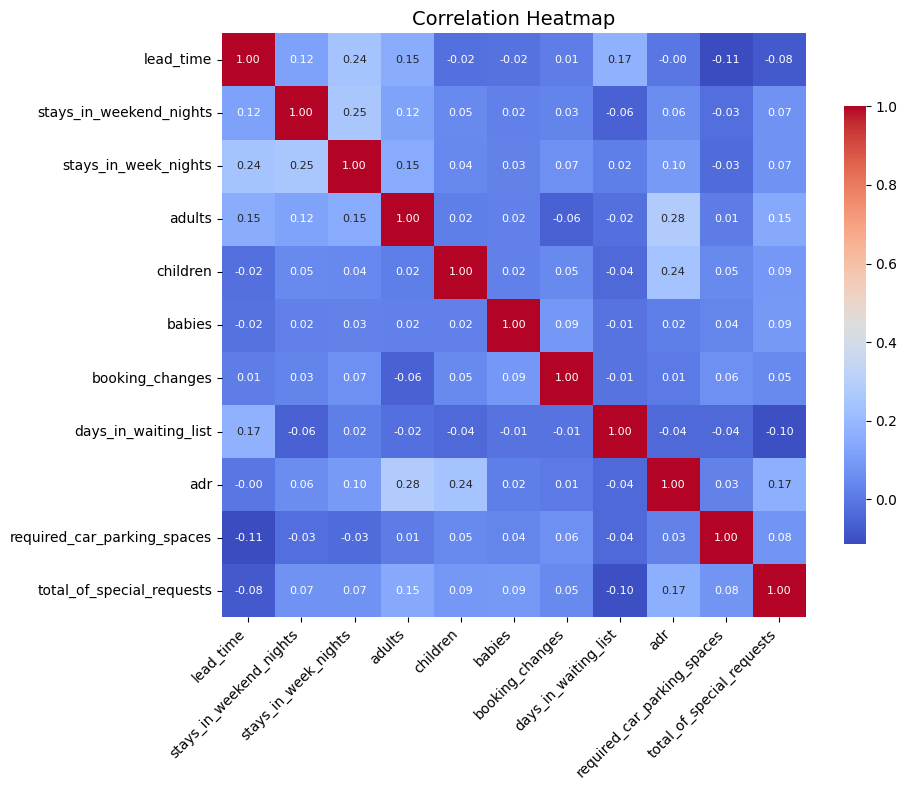

In [14]:
numeric_cols = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]
corr = df_capped[numeric_cols].corr()

plt.figure(figsize=(10, 8))  

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",           
    annot_kws={"size": 8},  
    cmap='coolwarm',
    square=True,         
    cbar_kws={"shrink": .75}  
)

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Lead Time to Cancellation

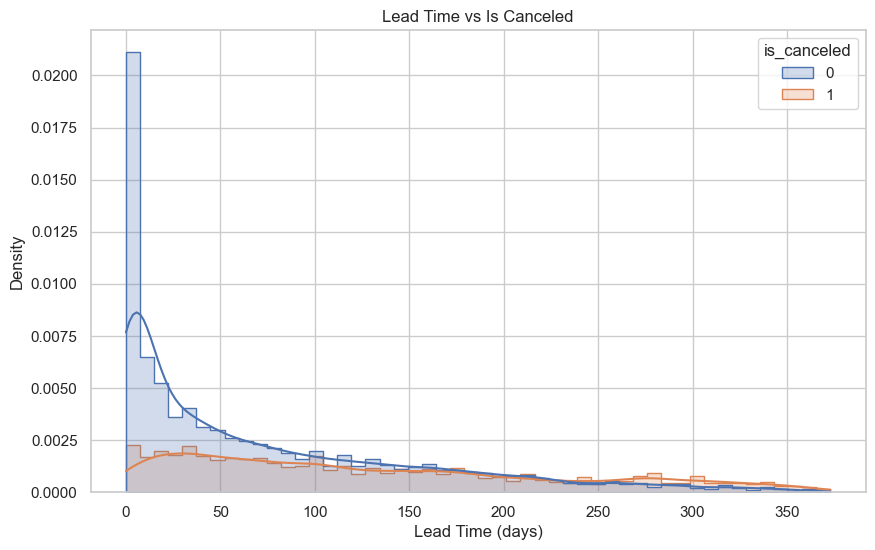

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_capped,
    x='lead_time',
    hue='is_canceled',
    bins=50,
    kde=True,
    element="step",
    stat="density"
)
plt.title('Lead Time vs Is Canceled')
plt.xlabel('Lead Time (days)')
plt.ylabel('Density')
plt.show()


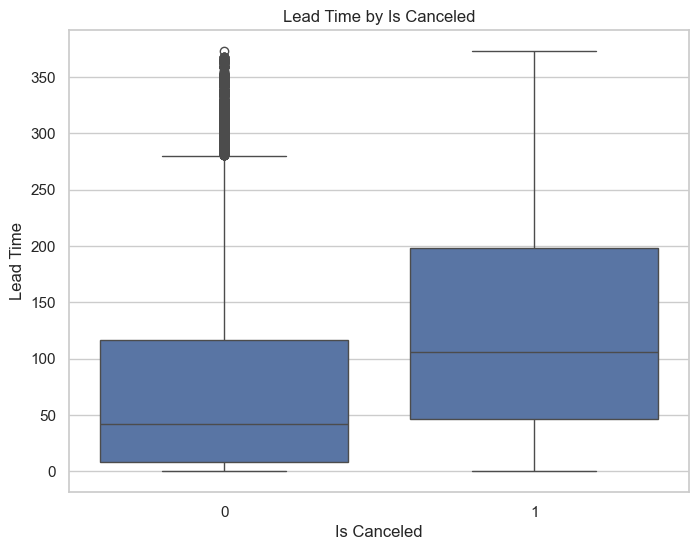

In [16]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_capped, x='is_canceled', y='lead_time')
plt.title('Lead Time by Is Canceled')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')
plt.show()


## Average Daily Rate vs Cancelled

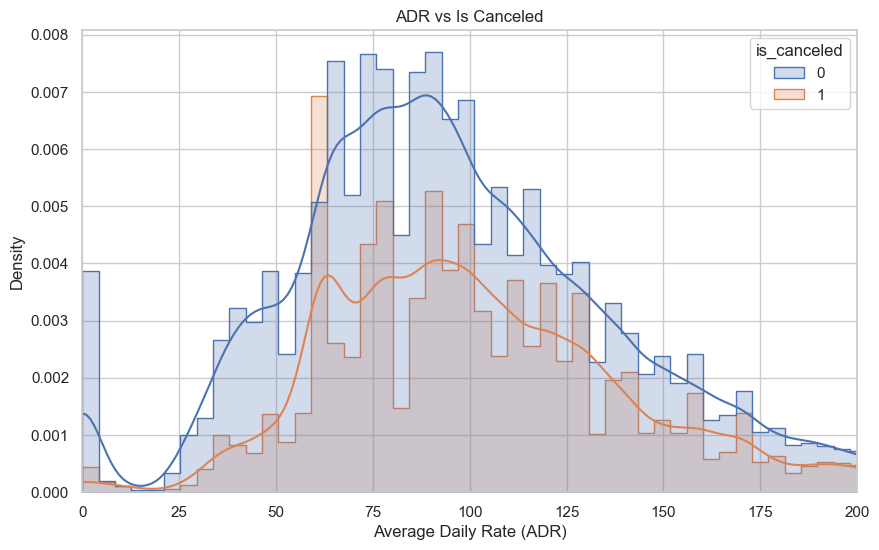

In [17]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_capped,
    x='adr',
    hue='is_canceled',
    bins=50,
    kde=True,
    element="step",
    stat="density"
)
plt.title('ADR vs Is Canceled')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Density')
plt.xlim(0, df_capped['adr'].quantile(0.99))  # limit to 99th percentile to reduce outlier effect
plt.show()


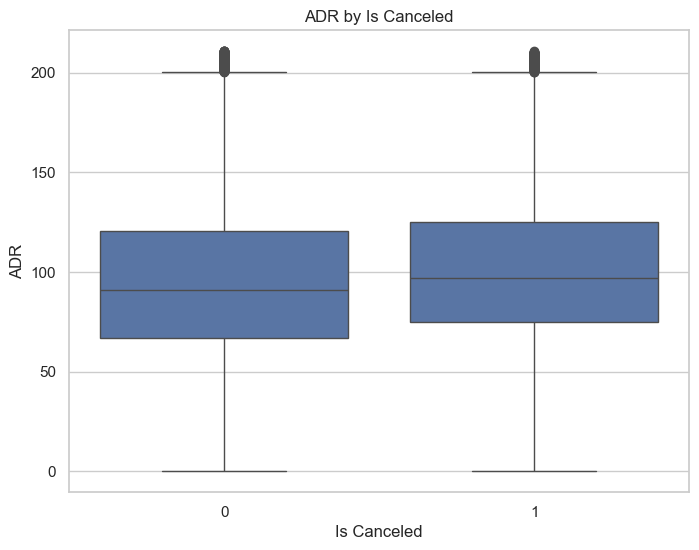

In [18]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_capped, x='is_canceled', y='adr')
plt.title('ADR by Is Canceled')
plt.xlabel('Is Canceled')
plt.ylabel('ADR')
plt.show()


## Days in Waiting to Cancellation

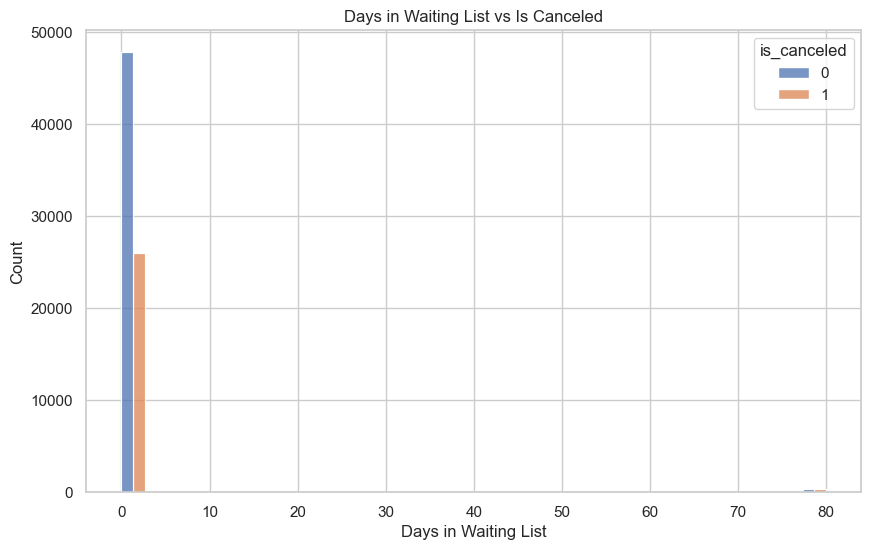

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_capped,
    x='days_in_waiting_list',
    hue='is_canceled',
    multiple='dodge',
    bins=30
)
plt.title('Days in Waiting List vs Is Canceled')
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.show()

## Cancellation Over Time

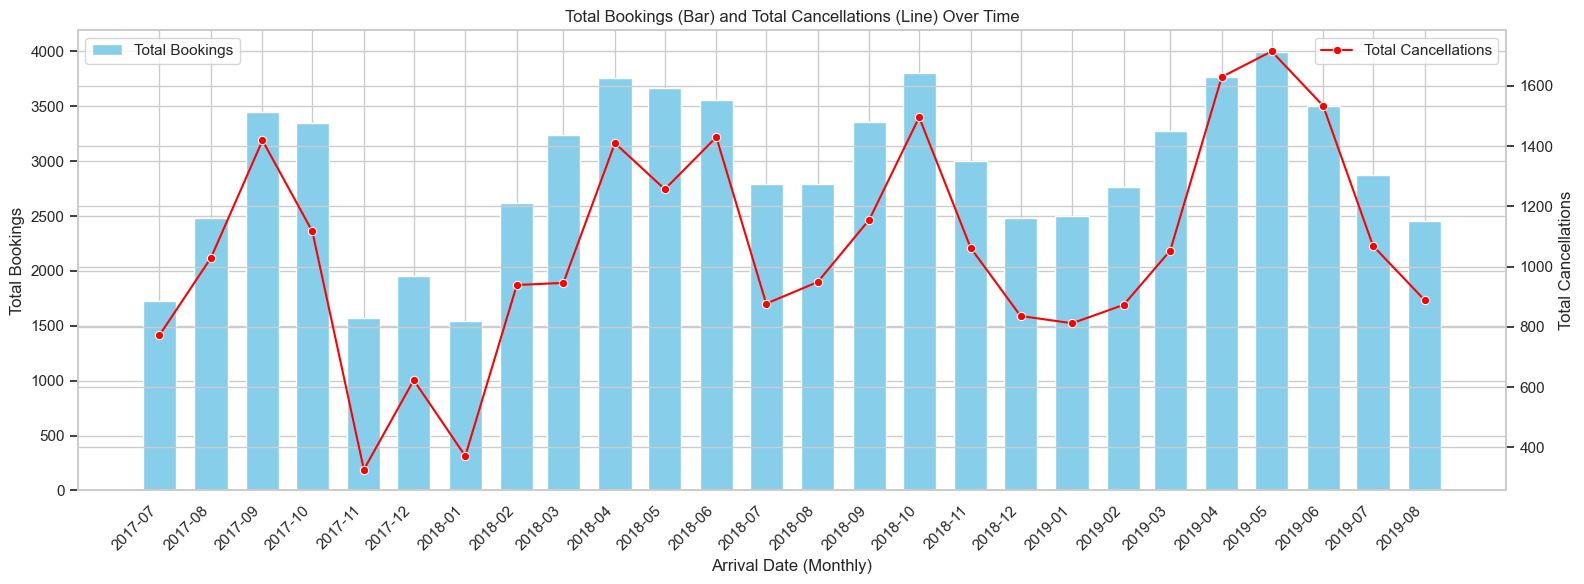

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

# 1️⃣ Ensure proper datetime
df_capped['arrival_date'] = pd.to_datetime(
    df_capped['arrival_date_year'].astype(str) + '-' + df_capped['arrival_date_month'] + '-01',
    format='%Y-%B-%d'
)

# 2️⃣ Group by month
monthly_data = (
    df_capped
    .groupby('arrival_date')
    .agg(
        total_bookings=('is_canceled', 'count'),
        total_canceled=('is_canceled', 'sum')
    )
    .reset_index()
    .sort_values('arrival_date')
)

# 3️⃣ Plot using matplotlib.bar + seaborn.lineplot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Use matplotlib bar() instead of sns.barplot to handle datetime properly
ax1.bar(
    monthly_data['arrival_date'],
    monthly_data['total_bookings'],
    color='skyblue',
    label='Total Bookings',
    width=20  # adjust width for better spacing
)

# Line plot on same axis or secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    data=monthly_data,
    x='arrival_date',
    y='total_canceled',
    color='red',
    marker='o',
    ax=ax2,
    label='Total Cancellations'
)

# Titles and labels
ax1.set_title('Total Bookings (Bar) and Total Cancellations (Line) Over Time')
ax1.set_xlabel('Arrival Date (Monthly)')
ax1.set_ylabel('Total Bookings')
ax2.set_ylabel('Total Cancellations')

# Format x-axis as date
ax1.xaxis_date()
ax1.set_xticks(monthly_data['arrival_date'])
ax1.set_xticklabels(
    monthly_data['arrival_date'].dt.strftime('%Y-%m'),
    rotation=45, ha='right'
)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [21]:

df_capped['arrival_date'] = pd.to_datetime(
    df_capped['arrival_date_year'].astype(str) + '-' + df_capped['arrival_date_month'] + '-01',
    format='%Y-%B-%d'
)

monthly_cancel_counts = (
    df_capped
    .groupby(['arrival_date', 'is_canceled'])
    .size()
    .reset_index(name='count')
    .pivot(index='arrival_date', columns='is_canceled', values='count')
    .fillna(0)
    .astype(int)
    .rename(columns={0: 'Not Canceled', 1: 'Canceled'})
    .sort_index()
)

print(monthly_cancel_counts)


is_canceled   Not Canceled  Canceled
arrival_date                        
2017-07-01             952       772
2017-08-01            1457      1029
2017-09-01            2033      1419
2017-10-01            2230      1117
2017-11-01            1246       326
2017-12-01            1331       623
2018-01-01            1174       371
2018-02-01            1683       939
2018-03-01            2292       946
2018-04-01            2350      1410
2018-05-01            2409      1257
2018-06-01            2129      1430
2018-07-01            1915       877
2018-08-01            1846       949
2018-09-01            2202      1156
2018-10-01            2309      1496
2018-11-01            1938      1062
2018-12-01            1647       836
2019-01-01            1687       812
2019-02-01            1891       873
2019-03-01            2219      1053
2019-04-01            2134      1630
2019-05-01            2277      1715
2019-06-01            1973      1534
2019-07-01            1809      1069
2

## Deposit Type to Cancellation

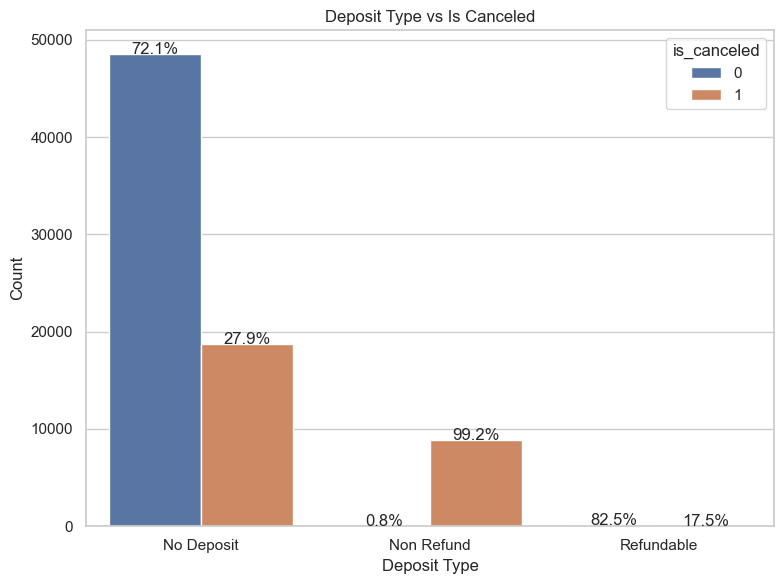

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_capped, x='deposit_type', hue='is_canceled')

# Get total count per deposit_type
group_totals = df_capped.groupby('deposit_type').size().to_dict()

# Add percentage labels
for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue
    deposit = bar.get_x() + bar.get_width() / 2.
    deposit_label = ax.get_xticklabels()[int(round(deposit))].get_text()
    total = group_totals[deposit_label]
    percentage = f'{100 * height / total:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2., height + 1, percentage, ha='center')

plt.title('Deposit Type vs Is Canceled')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Customer Type vs Cancellation

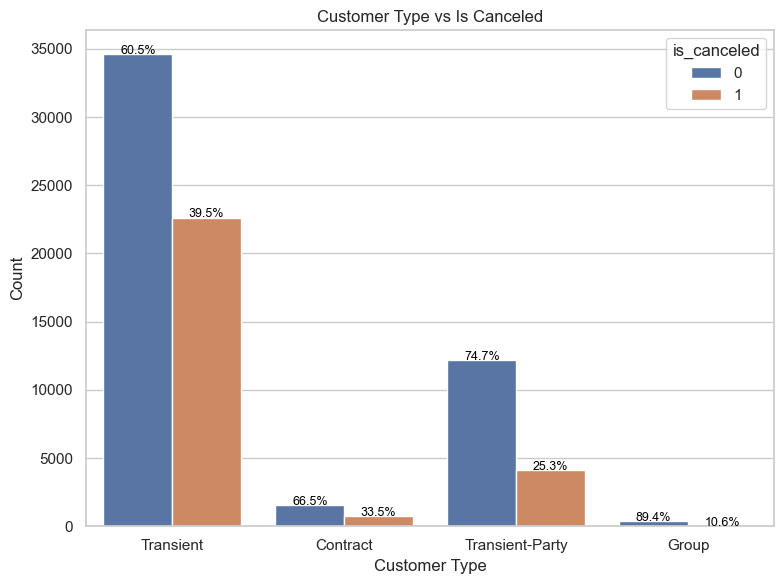

In [36]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_capped, x='customer_type', hue='is_canceled')
plt.title('Customer Type vs Is Canceled')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Total count per customer_type
totals = df_capped['customer_type'].value_counts().to_dict()

# Add percentage labels
for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue
    # Get the x-axis category (customer_type)
    x = bar.get_x() + bar.get_width() / 2.
    xtick_index = int(round(x))  # approximate to nearest xtick
    if xtick_index >= len(ax.get_xticks()):
        continue
    label = ax.get_xticklabels()[xtick_index].get_text()
    total = totals.get(label, 1)
    percent = f'{100 * height / total:.1f}%'
    ax.text(x, height + 1, percent, ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# Previous Cancellation Effect

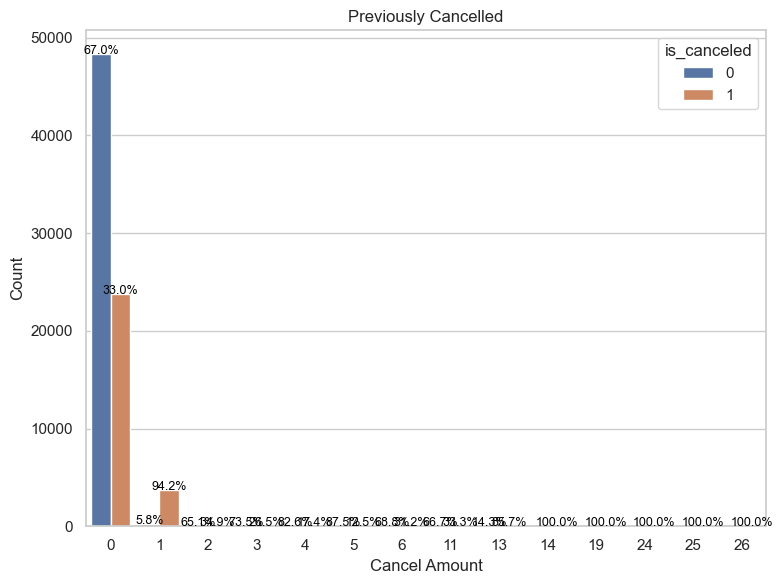

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_capped, x='previous_cancellations', hue='is_canceled')
plt.title('Previously Cancelled')
plt.xlabel('Cancel Amount')
plt.ylabel('Count')

# Calculate total per 'previous_cancellations' group
group_totals = df_capped.groupby('previous_cancellations')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)

# Add percentage labels on each bar (standardized within each x value)
for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue
    x = bar.get_x() + bar.get_width() / 2.
    cat = bar.get_x() + bar.get_width() / 2.
    
    # Get corresponding 'x' and 'hue' values
    x_val = bar.get_x() + bar.get_width() / 2
    xtick_index = int(round(x_val))
    if xtick_index >= len(ax.get_xticks()):
        continue
    
    x_label = ax.get_xticklabels()[xtick_index].get_text()
    hue_label = bar.get_facecolor()  # fallback if needed
    
    # Determine whether hue is 0 or 1 by checking its color index
    hue_idx = 0 if bar.get_facecolor() == ax.patches[0].get_facecolor() else 1

    try:
        percent = group_totals.loc[int(x_label), hue_idx] * 100
        label = f'{percent:.1f}%'
    except:
        label = ''

    ax.text(x, height + 1, label, ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

## Booking Changes vs Cancellation

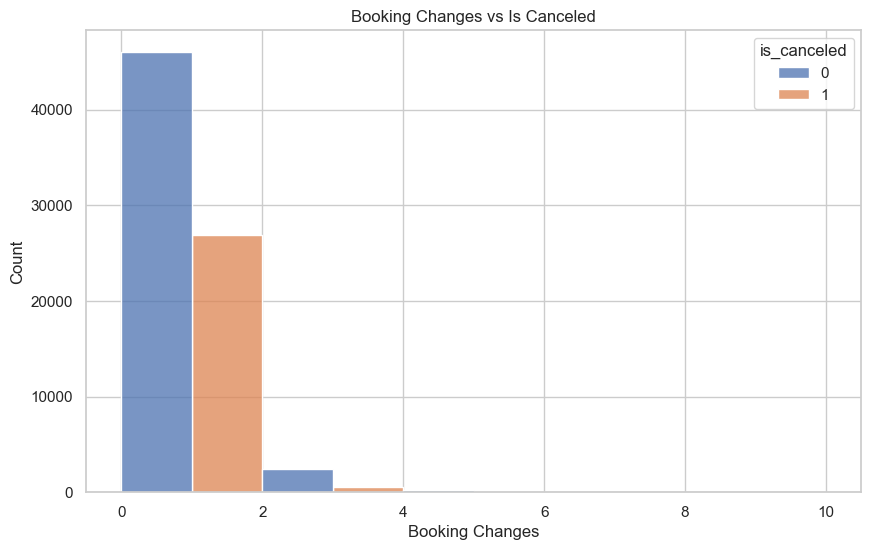

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_capped,
    x='booking_changes',
    hue='is_canceled',
    multiple='dodge',
    bins=5
)
plt.title('Booking Changes vs Is Canceled')
plt.xlabel('Booking Changes')
plt.ylabel('Count')
plt.show()

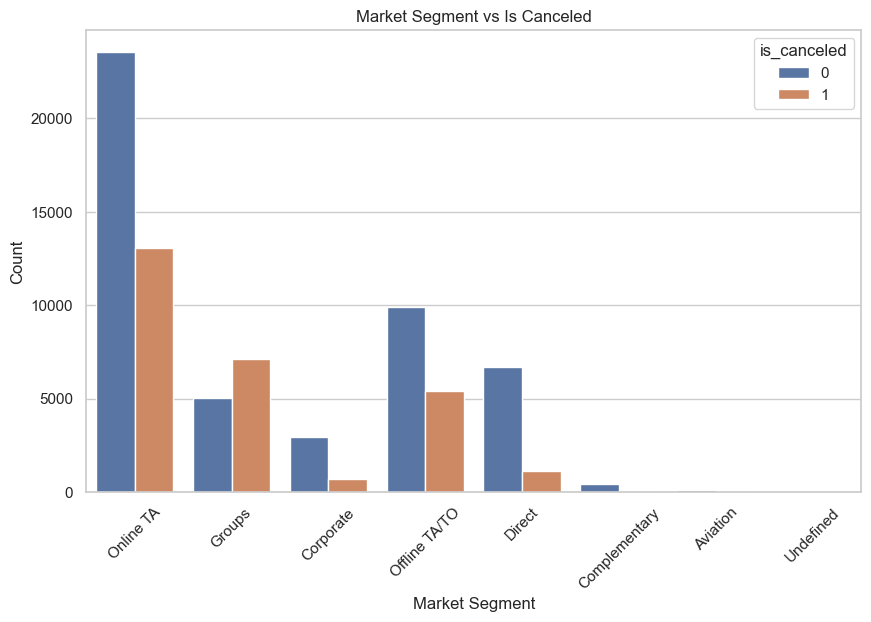

In [26]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_capped, x='market_segment', hue='is_canceled')
plt.title('Market Segment vs Is Canceled')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


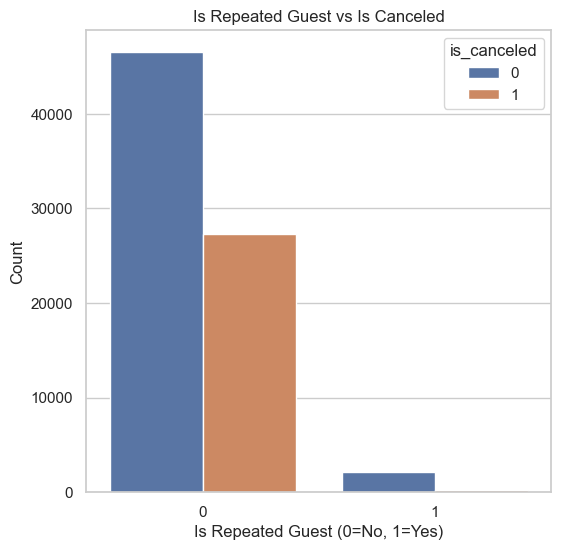

In [27]:

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.countplot(data=df_capped, x='is_repeated_guest', hue='is_canceled')
plt.title('Is Repeated Guest vs Is Canceled')
plt.xlabel('Is Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


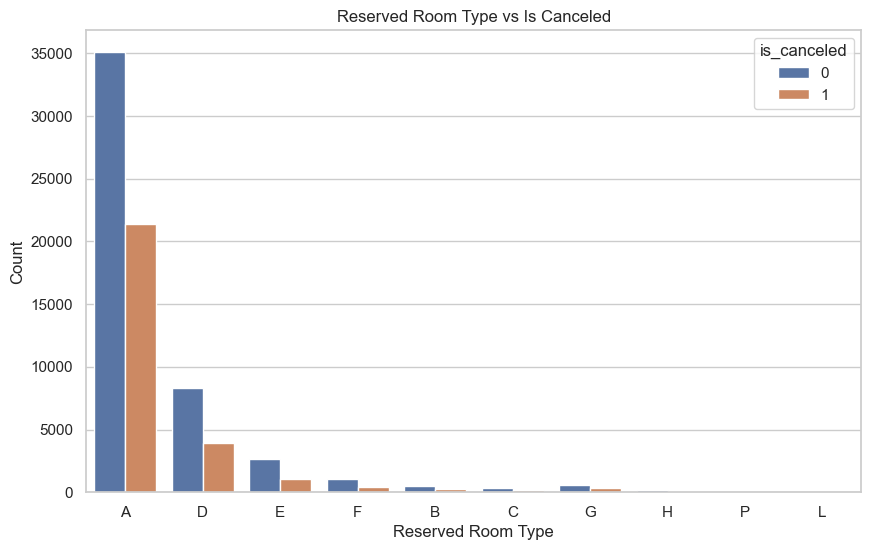

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_capped, x='reserved_room_type', hue='is_canceled')
plt.title('Reserved Room Type vs Is Canceled')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.show()

Drop Reservation Status because it might cause Data Leakage

Drop Hotel and BookingID because the name and identifier is irrelevant for further Analysis

In [29]:
df_capped = df_capped.drop(['reservation_status', 'hotel', 'bookingID', 'agent'], axis=1)


In [ ]:
df_capped.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
0,0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0,Transient,38.40,0,0,2019-01-14,2019-01-01
2,1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0,Transient,110.00,0,0,2018-11-25,2019-05-01
3,0,0,2018,October,43,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,0,Transient,45.00,0,0,2018-10-18,2018-10-01
4,1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0,Transient,57.92,0,1,2017-08-24,2017-09-01
6,0,205,2019,June,24,13,0,4,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,150.75,0,2,2019-06-17,2019-06-01


# Splitting

In [ ]:
# Drop NaN values from both X and y simultaneously
df_ready = df_capped.dropna(subset=['is_canceled'])  # Drop rows with NaN in the target column
X = df_ready.drop(['is_canceled'], axis=1)         # Drop the 'is_canceled' column from the dataset to get features
y = df_ready['is_canceled']                        # Extract 'is_canceled' as the target variable

# Now, X and y should have the same number of samples
print(X.shape)
print(y.shape)


(76289, 29)
(76289,)


In [ ]:
from sklearn.model_selection import train_test_split
# First, split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Multicollinearity Study & Feature Engineering

In [ ]:
# Calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

In [ ]:
# Filter only numeric columns
df_train_numeric = X_train.select_dtypes(include=['number'])

# Drop columns with NaN or inf values
df_train_numeric = df_train_numeric.replace([np.inf, -np.inf], np.nan)
df_train_numeric = df_train_numeric.dropna(axis=1)

# Add a constant
X = add_constant(df_train_numeric)

# Calculate VIF
vif_scores = pd.DataFrame({
    'Feature': X.columns,
    'VIF_score': [vif(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant column from results
vif_scores = vif_scores[vif_scores['Feature'] != 'const']

vif_scores.sort_values(by='VIF_score', ascending=False)

,Feature,VIF_score
2,arrival_date_year,1.677713
3,arrival_date_week_number,1.601678
16,adr,1.318692
10,is_repeated_guest,1.294024
12,previous_bookings_not_canceled,1.255050
1,lead_time,1.215520
7,adults,1.181258
6,stays_in_week_nights,1.179965
18,total_of_special_requests,1.101578
5,stays_in_weekend_nights,1.101290


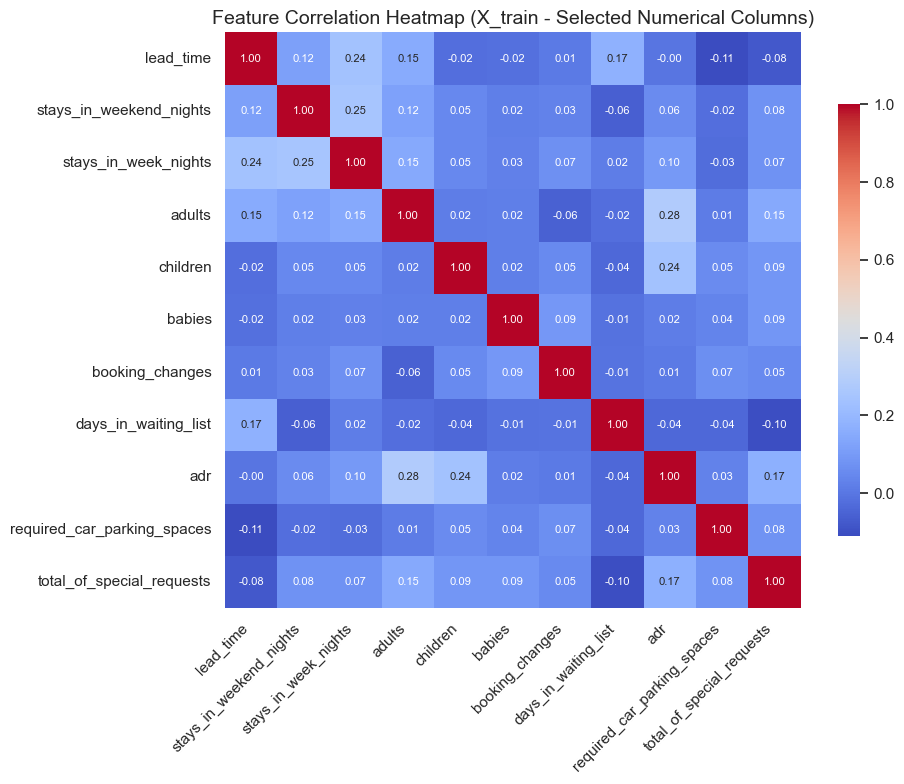

In [ ]:
numeric_cols = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

# ✅ Select only these columns from X_train
X_train_numeric = X_train[numeric_cols]

# ✅ Compute correlation matrix
corr_matrix = X_train_numeric.corr()

# ✅ Plot heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": 0.75}
)

plt.title("Feature Correlation Heatmap (X_train - Selected Numerical Columns)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Encoding & Scaling

In [ ]:
X_train.head(5)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
920,13,2018,April,16,16,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,75.0,0,1,2018-04-17,2018-04-01
46804,158,2018,May,22,24,0,2,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,37.0,31,Transient,130.0,0,0,2018-01-18,2018-05-01
55328,19,2018,April,15,4,1,1,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,298.0,0,Transient-Party,54.5,0,0,2018-04-06,2018-04-01
33333,85,2019,June,24,17,2,2,2,0.0,0,BB,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient,126.0,0,1,2019-06-21,2019-06-01
25787,0,2017,December,52,25,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,Non Refund,240.0,0,Transient,55.0,0,0,2017-12-25,2017-12-01


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ordinal_cols = ['arrival_date_month']
month_order = [['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']]
ordinal_encoder = OrdinalEncoder(categories=month_order)

# 2️⃣ One-hot (nominal)
onehot_cols = [
    'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'
]
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 3️⃣ Numeric
numeric_cols = [
    'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

In [ ]:
numeric_scaler = StandardScaler()

# 4️⃣ Binary (safe to keep numeric if 0/1)
binary_cols = ['is_repeated_guest']

# === Pipeline for numeric (just scaling)
numeric_pipeline = Pipeline([('scaler', numeric_scaler)])

# === ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_cols),
    ('onehot', onehot_encoder, onehot_cols),
    ('num', numeric_pipeline, numeric_cols),
    ('bin', 'passthrough', binary_cols) 
])

In [ ]:
# === Fit on train ===
X_train_processed = preprocessor.fit_transform(X_train)

# === Build final column names ===
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
all_columns = ordinal_cols + list(onehot_feature_names) + numeric_cols + binary_cols


In [ ]:
# === Convert to DataFrame ===
X_train_final = pd.DataFrame(X_train_processed, columns=all_columns, index=X_train.index)

# === Transform test ===
X_test_processed = preprocessor.transform(X_test)
X_test_final = pd.DataFrame(X_test_processed, columns=all_columns, index=X_test.index)

In [ ]:
X_train_final

,arrival_date_month,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_HKG,country_HRV,country_HUN,country_IDN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_repeated_guest
920,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
X_test_final

,arrival_date_month,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_HKG,country_HRV,country_HUN,country_IDN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_repeated_guest
50787,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

# Machine Learning Modeling

# Model 1 - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Logistic Regression with default settings
lr_default = LogisticRegression()

# Train
lr_default.fit(X_train_final, y_train)

LogisticRegression()

In [ ]:
# Predict
y_train_pred = lr_default.predict(X_train_final)
y_test_pred = lr_default.predict(X_test_final)

# Evaluate
print("=== Logistic Regression (Default) ===")
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

=== Logistic Regression (Default) ===

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     38938
           1       0.80      0.65      0.72     22093

    accuracy                           0.82     61031
   macro avg       0.81      0.78      0.79     61031
weighted avg       0.81      0.82      0.81     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      9761
           1       0.79      0.63      0.70      5497

    accuracy                           0.81     15258
   macro avg       0.80      0.77      0.78     15258
weighted avg       0.81      0.81      0.80     15258



### Hyperparameter

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l2'],                      # Regularization type
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Compatible solvers for 'l2'
    'max_iter': [100, 200, 300]             # Max iterations to ensure convergence
}


In [ ]:
# 2️⃣ Create the base Logistic Regression model
lr = LogisticRegression()

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,               
    scoring='recall', 
    n_jobs=-1,          
    verbose=1           
)

In [ ]:
# 4️⃣ Fit GridSearchCV on training data
grid_search.fit(X_train_final, y_train)

# 5️⃣ Get the best model
best_lr = grid_search.best_estimator_

print("Best Parameters Found:", grid_search.best_params_)

# 6️⃣ Predict on train and test sets
y_train_pred_best = best_lr.predict(X_train_final)
y_test_pred_best = best_lr.predict(X_test_final)

# 7️⃣ Evaluate performance
print("\n=== Logistic Regression (Best Model from Grid Search) ===")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best))

print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_best))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_best))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters Found: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

=== Logistic Regression (Best Model from Grid Search) ===
Training Accuracy: 0.8169946420671462
Test Accuracy: 0.8100013107877835

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     38938
           1       0.81      0.65      0.72     22093

    accuracy                           0.82     61031
   macro avg       0.81      0.78      0.79     61031
weighted avg       0.82      0.82      0.81     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      9761
           1       0.80      0.64      0.71      5497

    accuracy                           0.81     15258
   macro avg       0.81      0.77      0.78     15258
weighted avg       0.81      0.81      0.80     15258

# Model 2 - 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],     # Split quality
    'max_depth': [None, 5, 10, 20, 50],   # Max tree depth
    'min_samples_split': [2, 5, 10],      # Min samples to split
    'min_samples_leaf': [1, 2, 4],        # Min samples at leaf
}

In [ ]:
# 2️⃣ Base Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# 3️⃣ GridSearchCV with recall scoring
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='recall',   # 🚩 Focus on recall!
    n_jobs=-1,
    verbose=1
)

In [ ]:
# 4️⃣ Fit GridSearchCV on training data
grid_search_dt.fit(X_train_final, y_train)

# 5️⃣ Get the best model
best_dt = grid_search_dt.best_estimator_

print("Best Parameters Found (Maximizing Recall):", grid_search_dt.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters Found (Maximizing Recall): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# 6️⃣ Predict on train and test sets
y_train_pred_best_dt = best_dt.predict(X_train_final)
y_test_pred_best_dt = best_dt.predict(X_test_final)

# 7️⃣ Evaluate performance
print("\n=== Decision Tree (Best Model for Recall) ===")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_dt))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best_dt))

print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_best_dt))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_best_dt))


=== Decision Tree (Best Model for Recall) ===
Training Accuracy: 0.9960511871016369
Test Accuracy: 0.8382487875213003

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38938
           1       1.00      0.99      0.99     22093

    accuracy                           1.00     61031
   macro avg       1.00      1.00      1.00     61031
weighted avg       1.00      1.00      1.00     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      9761
           1       0.77      0.78      0.78      5497

    accuracy                           0.84     15258
   macro avg       0.82      0.82      0.82     15258
weighted avg       0.84      0.84      0.84     15258



# Model 3 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'criterion': ['gini', 'entropy'],         # Split quality measure
    'max_depth': [None, 5, 10, 20, 50],       # Max tree depth
    'min_samples_split': [2, 5, 10],          # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples at a leaf
}

In [ ]:
# 2️⃣ Base Random Forest model
rf = RandomForestClassifier(random_state=42)

# 3️⃣ RandomizedSearchCV: sample e.g., 20 random combinations
random_search_rf = RandomizedSearchCV(
    estimator=rf, # Random Forest
    param_distributions=param_dist, # Kombinasi RandomSearchCV (Dari ParamDist), 1 Kombinasi = Kombinasi Param Dist, 
    n_iter=20,                # 20 Kombinasi 
    scoring='recall',         # Skor Recall
    cv=3,                     # Cross Validation
    n_jobs=-1,                # 
    random_state=42,
    verbose=1
)

In [ ]:
# 4️⃣ Fit RandomizedSearchCV on training data
random_search_rf.fit(X_train_final, y_train)

# 5️⃣ Get the best model
best_rf = random_search_rf.best_estimator_

print("Best Parameters Found (Randomized Search, Maximizing Recall):", random_search_rf.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters Found (Randomized Search, Maximizing Recall): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
# 6️⃣ Predict on train and test sets
y_train_pred_best_rf = best_rf.predict(X_train_final)
y_test_pred_best_rf = best_rf.predict(X_test_final)

# 7️⃣ Evaluate performance
print("\n=== Random Forest (Best Model for Recall) ===")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best_rf))

print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_best_rf))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_best_rf))


=== Random Forest (Best Model for Recall) ===
Training Accuracy: 0.9960511871016369
Test Accuracy: 0.8809804692620264

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38938
           1       1.00      0.99      0.99     22093

    accuracy                           1.00     61031
   macro avg       1.00      1.00      1.00     61031
weighted avg       1.00      1.00      1.00     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      9761
           1       0.88      0.78      0.83      5497

    accuracy                           0.88     15258
   macro avg       0.88      0.86      0.87     15258
weighted avg       0.88      0.88      0.88     15258



                       Feature  Importance
204                  lead_time    0.112032
217                        adr    0.078774
198    deposit_type_Non Refund    0.066430
207  arrival_date_day_of_month    0.060897
206   arrival_date_week_number    0.058196
124                country_PRT    0.054516
197    deposit_type_No Deposit    0.048288
219  total_of_special_requests    0.046808
0           arrival_date_month    0.039591
209       stays_in_week_nights    0.038120


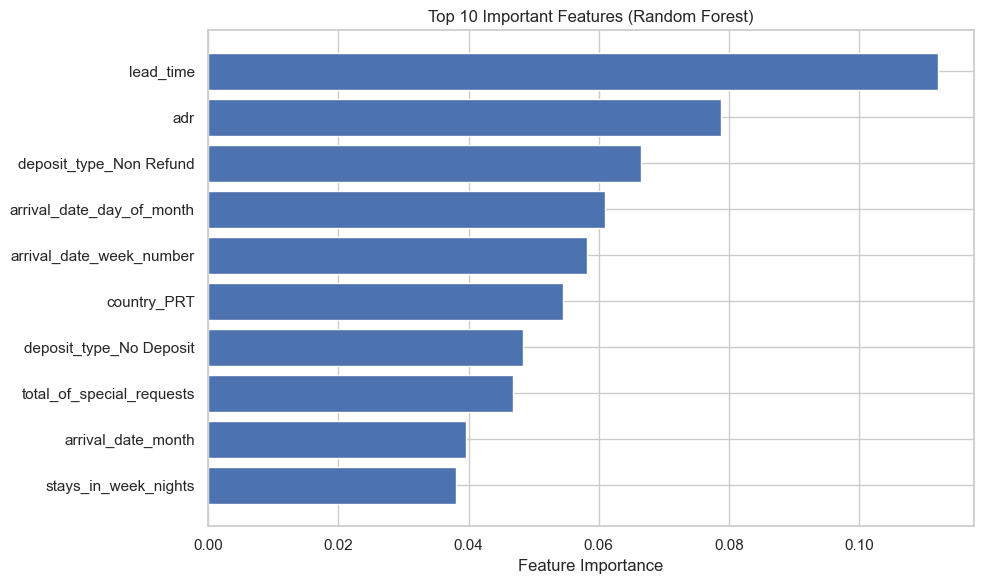

In [ ]:
# Get feature names
feature_names = X_train_final.columns

# Get feature importances from the Random Forest model
importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print(feature_importance.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10][::-1], feature_importance['Importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()
plt.show()


# Model 4 - 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'C': np.logspace(-3, 2, 6)
}

linear_svc = LinearSVC(random_state=42, max_iter=5000)

random_search_svm = RandomizedSearchCV(
    estimator=linear_svc,
    param_distributions=param_dist,
    n_iter=6,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

random_search_svm.fit(X_train_final, y_train)

best_svm = random_search_svm.best_estimator_
print("Best Parameters:", random_search_svm.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': np.float64(0.1)}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# ✅ 1️⃣ Predict on training and test sets
y_train_pred_best_svm = best_svm.predict(X_train_final)
y_test_pred_best_svm = best_svm.predict(X_test_final)

# ✅ 2️⃣ Evaluate performance
print("\n=== Linear SVM (Best Model for Recall) ===")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best_svm))

print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_best_svm))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_best_svm))



=== Linear SVM (Best Model for Recall) ===
Training Accuracy: 0.8140289361144336
Test Accuracy: 0.8075763533883864

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     38938
           1       0.81      0.64      0.71     22093

    accuracy                           0.81     61031
   macro avg       0.81      0.78      0.79     61031
weighted avg       0.81      0.81      0.81     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      9761
           1       0.80      0.62      0.70      5497

    accuracy                           0.81     15258
   macro avg       0.81      0.77      0.78     15258
weighted avg       0.81      0.81      0.80     15258



# Model 5 - 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_neighbors': [1, 3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=20,      # 🔑 Try only 20 random combos
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

random_search_knn.fit(X_train_final, y_train)

best_knn = random_search_knn.best_estimator_
print("Best Parameters:", random_search_knn.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 1}


In [ ]:
# ✅ 1️⃣ Predict using the best KNN found
y_train_pred_best_knn = best_knn.predict(X_train_final)
y_test_pred_best_knn = best_knn.predict(X_test_final)

# ✅ 2️⃣ Evaluate performance
print("\n=== KNN (Best Model for Recall) ===")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_knn))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best_knn))

print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_best_knn))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_best_knn))


=== KNN (Best Model for Recall) ===
Training Accuracy: 0.9943962904097917
Test Accuracy: 0.8212740857255211

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38938
           1       0.99      0.99      0.99     22093

    accuracy                           0.99     61031
   macro avg       0.99      0.99      0.99     61031
weighted avg       0.99      0.99      0.99     61031


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      9761
           1       0.74      0.77      0.76      5497

    accuracy                           0.82     15258
   macro avg       0.81      0.81      0.81     15258
weighted avg       0.82      0.82      0.82     15258



# Key Metrics & Evaluation

| Model               | Dataset | Accuracy | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) |
|---------------------|---------|----------|----------------|------------|---------------|----------------|------------|---------------|
| Logistic Regression | Train   | 0.82     | 0.82           | 0.91       | 0.86          | 0.81           | 0.65       | 0.72          |
| Logistic Regression | Test    | 0.81     | 0.82           | 0.91       | 0.86          | 0.80           | 0.64       | 0.71          |
| Decision Tree       | Train   | 1.00     | 1.00           | 1.00       | 1.00          | 1.00           | 0.99       | 0.99          |
| Decision Tree       | Test    | 0.84     | 0.87           | 0.87       | 0.87          | 0.77           | 0.78       | 0.78          |
| Random Forest       | Train   | 1.00     | 1.00           | 1.00       | 1.00          | 1.00           | 0.99       | 0.99          |
| Random Forest       | Test    | 0.88     | 0.88           | 0.94       | 0.91          | 0.88           | 0.78       | 0.83          |
| Linear SVM          | Train   | 0.81     | 0.82           | 0.91       | 0.86          | 0.81           | 0.64       | 0.71          |
| Linear SVM          | Test    | 0.81     | 0.81           | 0.91       | 0.86          | 0.80           | 0.62       | 0.70          |
| KNN                 | Train   | 0.99     | 1.00           | 1.00       | 1.00          | 0.99           | 0.99       | 0.99          |
| KNN                 | Test    | 0.82     | 0.87           | 0.85       | 0.86          | 0.74           | 0.77       | 0.76          |


In the context of predicting hotel booking cancellations, the primary goal is to correctly identify as many guests who are likely to cancel as possible, so that the hotel can take proactive measures to minimize lost revenue and optimize room occupancy. For this reason, the recall score for the cancellation class (class 1) is the most critical metric, as it reflects the model’s ability to capture true cancellations and reduce the number of missed cases (false negatives). 

A high recall ensures that fewer actual cancellations go undetected, which is more important than occasionally predicting a cancellation that does not happen (a false positive), as the latter generally carries a lower operational risk. Based on the classification results, the Random Forest model achieves a high recall of 0.78 for the cancellation class on the test data, matching the Decision Tree’s recall and slightly outperforming K-Nearest Neighbors. 

However, while the Decision Tree, Random Forest, and K-Nearest Neighbors models all exhibit overfitting to some extent, as indicated by their near-perfect performance on the training data, the Random Forest still maintains stronger generalization compared to the others, achieving the highest overall accuracy and robust recall on the test set. Therefore, despite some overfitting, the Random Forest remains the most reliable option for predicting cancellations while balancing predictive power and performance on unseen data.

## Real Case Example

Say each correctly predicted cancellation earns the hotel $10 because they can resell the room. 

If the model predicts a cancellation but the guest actually shows up, the hotel still gains $10 from overbooking but may lose $4 for compensating the guest. 

Meanwhile, if the model fails to predict a cancellation, the hotel loses $10 because the room goes empty. This simple calculation shows how the prediction affects profit and loss.

In [ ]:
from sklearn.metrics import confusion_matrix

def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN:', tn)
    print('TP:', tp)
    print('FN:', fn)
    print('FP:', fp)
    return tn, fp, fn, tp

# Use with Random Forest test predictions
tn, fp, fn, tp = value_prediction(y_test, y_test_pred_best_rf)


TN: 9158
TP: 4284
FN: 1213
FP: 603


In [ ]:
# Business impact calculation
print(f'Keuntungan: ${ (tp * 10) + (fp * 10) - (fp * 4) }')
print(f'Kerugian: ${ fn * 10 }')
print(f'Potensi keuntungan: ${ (tp * 10) + (fp * 10) - (fp * 4) - (fn * 10) }')

Keuntungan: $46458
Kerugian: $12130
Potensi keuntungan: $34328


These results show that, based on the Random Forest’s predictions, the hotel could gain $46,458 from correctly and proactively managing cancellations, but would still lose $12,130 due to missed cancellations, resulting in a net potential profit of $34,328. This illustrates how effective cancellation prediction can directly increase revenue while highlighting the cost of remaining false negatives.

# Insight & Recommendation